In [1]:
# From Python
# It requires OpenCV installed for Python
import matplotlib.pyplot as plt
import numpy as np

import sys
import cv2
import os
from sys import platform
import argparse

%matplotlib inline

# Import Openpose (Windows/Ubuntu/OSX)
dir_path = os.path.abspath("")
print(dir_path)

/openpose/build/examples/tutorial_api_python


In [2]:
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append(dir_path + '/../../python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
        print("YES")
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append('../../python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
        print("YESYES")
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e



YESYES


In [3]:
# Flags
parser = argparse.ArgumentParser()
parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000192.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
# parser.add_argument("--image_path", default="../../../examples/media/video.avi", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
# parser.add_argument("--video", default="../../../examples/media/video.avi", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
args = parser.parse_known_args()



In [4]:
# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "../../../models/"
params["video"] = True

# Add others in path?
for i in range(0, len(args[1])):
    curr_item = args[1][i]
    if i != len(args[1])-1: next_item = args[1][i+1]
    else: next_item = "1"
    if "--" in curr_item and "--" in next_item:
        key = curr_item.replace('-','')
        if key not in params:  params[key] = "1"
    elif "--" in curr_item and "--" not in next_item:
        key = curr_item.replace('-','')
        if key not in params: params[key] = next_item
print(params)


{'model_folder': '../../../models/', 'video': True}


In [5]:
# Construct it from system arguments
# op.init_argv(args[1])
# oppython = op.OpenposePython()

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()



In [6]:
# Process Image
datum = op.Datum()
imageToProcess = cv2.imread(args[0].image_path)
datum.cvInputData = imageToProcess
opWrapper.emplaceAndPop([datum])

print("OK")

OK


Body keypoints: 
[[[3.2809854e+02 2.1974371e+02 7.5993967e-01]
  [3.2289130e+02 2.1718504e+02 8.3385360e-01]
  [2.9802701e+02 2.2368245e+02 8.8920242e-01]
  [2.7715598e+02 2.5109933e+02 8.6595273e-01]
  [2.9809534e+02 2.7328116e+02 8.2083827e-01]
  [3.4900360e+02 2.1327135e+02 9.2912471e-01]
  [3.6726160e+02 2.3550529e+02 8.7097746e-01]
  [3.6850781e+02 2.6154324e+02 8.3065987e-01]
  [3.2806213e+02 2.8759146e+02 8.6716896e-01]
  [3.1245990e+02 2.8764346e+02 7.8310686e-01]
  [3.2936475e+02 3.3851541e+02 8.6039579e-01]
  [3.3854834e+02 3.9202173e+02 7.7205557e-01]
  [3.3985031e+02 2.8631238e+02 8.6554557e-01]
  [3.4376807e+02 3.3462039e+02 7.7605212e-01]
  [3.4638205e+02 3.7248010e+02 6.3853985e-01]
  [3.2416013e+02 2.1451590e+02 6.8749976e-01]
  [3.3074908e+02 2.1451418e+02 6.3172626e-01]
  [3.1632730e+02 2.0415282e+02 7.0270222e-01]
  [3.3860080e+02 2.0545940e+02 2.5160685e-01]
  [3.5936539e+02 3.8163797e+02 3.0262479e-01]
  [3.5938715e+02 3.8030585e+02 3.8734350e-01]
  [3.4764966e+02 

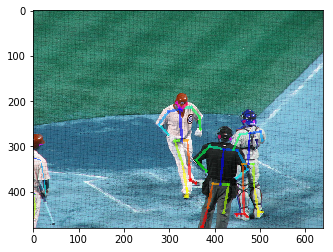

OKOK


In [7]:
# Display Image
print("Body keypoints: \n" + str(datum.poseKeypoints))
# cv2.imshow("OpenPose 1.4.0 - Tutorial Python API", datum.cvOutputData)
plt.imshow(datum.cvOutputData)
plt.show()
cv2.waitKey(0)
print("OKOK")
